### Интерполяция
##### Задача:
Написать функцию, которая строит интерполяционный многочлен $P_{\alpha}(x)$ на $[-k, k]$ для функции $$f(x) = 1 / (1 + x^2)$$ на равномерной сетке.

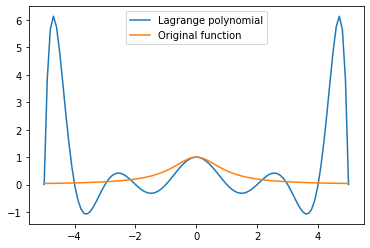

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def my_interpolation(x: np.ndarray, k: int = 5) -> np.ndarray:
    """Build Lagrange polynomial and calculate its values in points x."""
    xgrid = np.linspace(-k, k, 2 * k + 1, dtype=np.float64)
    ygrid = 1. / (1 + xgrid ** 2)
    res = []

    for v in x:
        s = 0.
        for i in range(2 * k + 1):
            p = 1.
            for j in range(2 * k + 1):
                if j == i:
                    continue
                p *= (v - xgrid[j]) / (xgrid[i] - xgrid[j]) * ygrid[i]
            s += p
        res.append(s)
    return np.array(res, dtype=np.float64)


x = np.linspace(-5, 5, 100)
y = my_interpolation(x)
# x = np.linspace(-10, 10, 1K)
plt.plot(x, y, label="Lagrange polynomial")
plt.plot(x, 1. / (1 + x ** 2), label="Original function")
plt.legend()
plt.show()
